In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_19647/3393394516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']


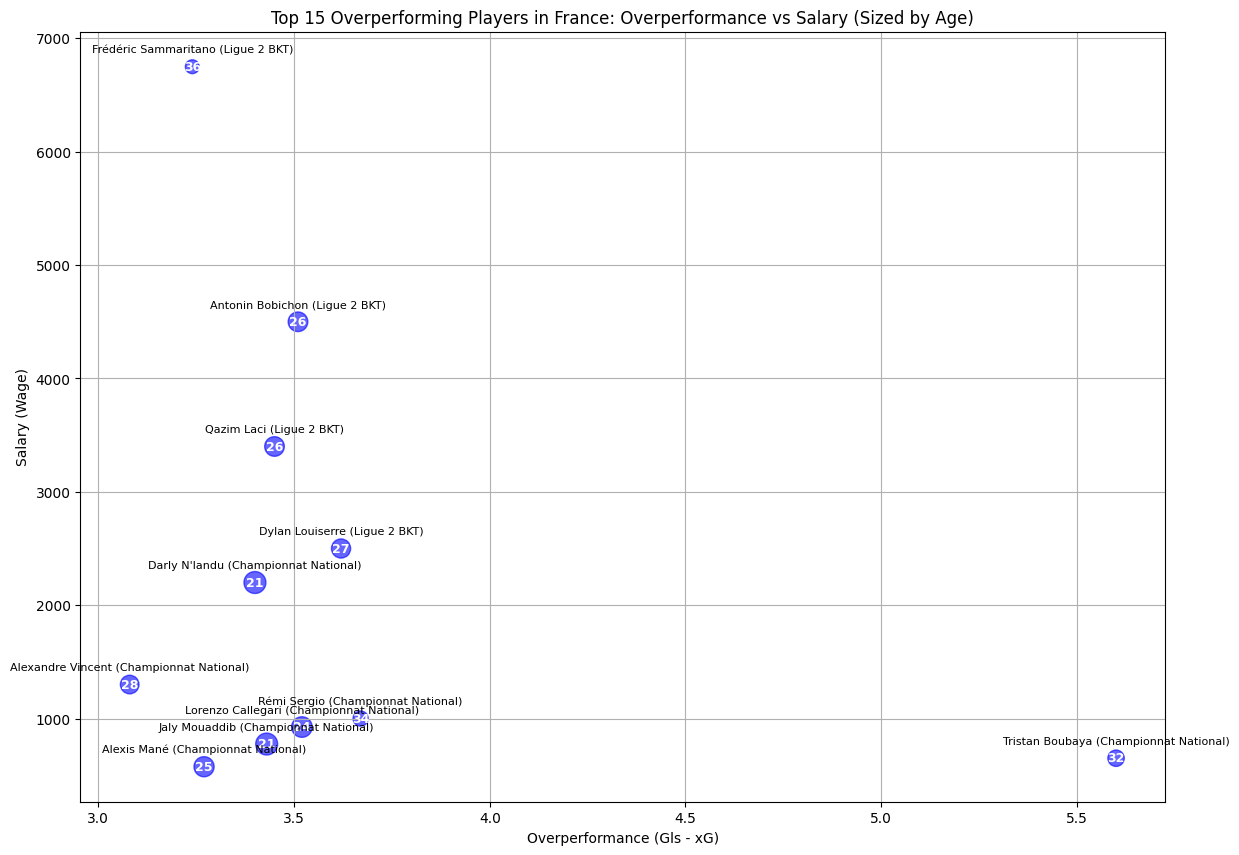

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données nettoyées
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Filtrer les joueurs qui évoluent en France
french_leagues = ["Ligue 2 BKT", "Championnat National", "Ligues régionales"]
df_france = df[df['Division'].isin(french_leagues)]

# Calculer l'overperformance des buteurs
df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']

# Sélectionner les 15 premières overperformances
top_overperformers_france = df_france.nlargest(15, 'Overperformance_Gls_xG')

# Retirer les salaires supérieurs à 50000
top_overperformers_france = top_overperformers_france[top_overperformers_france['Wage'] <= 50000]

# Créer le scatter plot avec overperformance en X et salaire en Y
plt.figure(figsize=(14, 10))

# Calculer la taille des points en fonction de l'âge (plus jeune = plus gros)
age_factor = (top_overperformers_france['Age'].max() - top_overperformers_france['Age']) + 10
plt.scatter(top_overperformers_france['Overperformance_Gls_xG'], top_overperformers_france['Wage'], 
            s=age_factor * 10, color='blue', alpha=0.6)

# Ajouter les noms des joueurs, leur championnat et leur âge dans les points
for i in range(len(top_overperformers_france)):
    player_name = top_overperformers_france.iloc[i]['Name']
    league_name = top_overperformers_france.iloc[i]['Division']
    age = top_overperformers_france.iloc[i]['Age']
    x = top_overperformers_france.iloc[i]['Overperformance_Gls_xG']
    y = top_overperformers_france.iloc[i]['Wage']
    
    # Annoter l'âge au centre du cercle
    plt.annotate(f"{age}", (x, y), 
                 textcoords="offset points", xytext=(0, 0), ha='center', va='center', 
                 fontsize=9, color='white', weight='bold')

    # Annoter le nom et le championnat légèrement au-dessus du cercle
    plt.annotate(f"{player_name} ({league_name})", (x, y),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Overperformance (Gls - xG)')
plt.ylabel('Salary (Wage)')
plt.title('Top 15 Overperforming Players in France: Overperformance vs Salary (Sized by Age)')
plt.grid(True)
plt.show()
